<a href="https://colab.research.google.com/github/YaraArbeed/Stroke_Prediction/blob/main/ML_project_Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Prediction**
Dataset:https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/code

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate , cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score , confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, mean_squared_error
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold



# Loading Dataset

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')


# Exploratory Data Analysis




In [ ]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [ ]:
df.tail(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.shape

(5110, 12)

**statistical & graphical representation of the dataset**


In [ ]:

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['hypertension'].plot(kind='hist', bins=20, title='hypertension')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['heart_disease'].plot(kind='hist', bins=20, title='heart_disease')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='age', y='hypertension', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='hypertension', y='heart_disease', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='heart_disease', y='avg_glucose_level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['hypertension'].plot(kind='line', figsize=(8, 4), title='hypertension')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['heart_disease'].plot(kind='line', figsize=(8, 4), title='heart_disease')
plt.gca().spines[['top', 'right']].set_visible(False)

# Bivariate analysis with target variable (stroke)


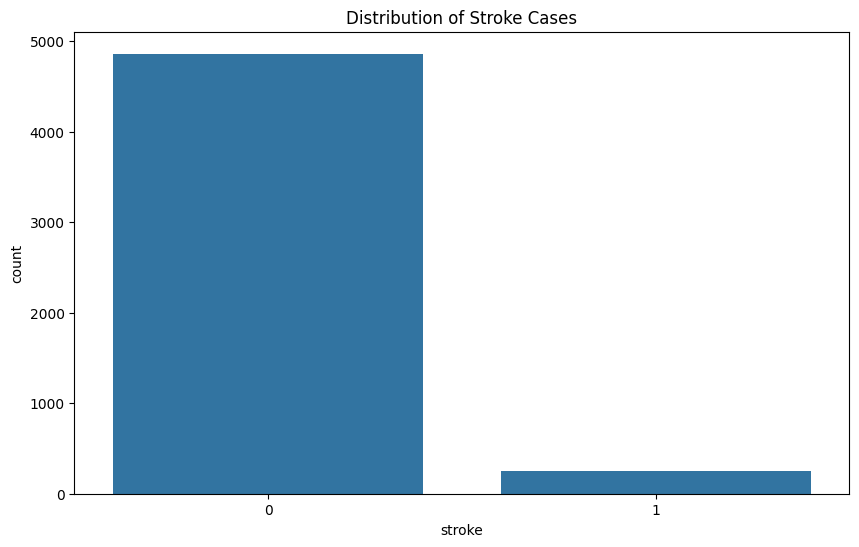

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Cases')
plt.show()

# Pair plot for numerical variables




<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

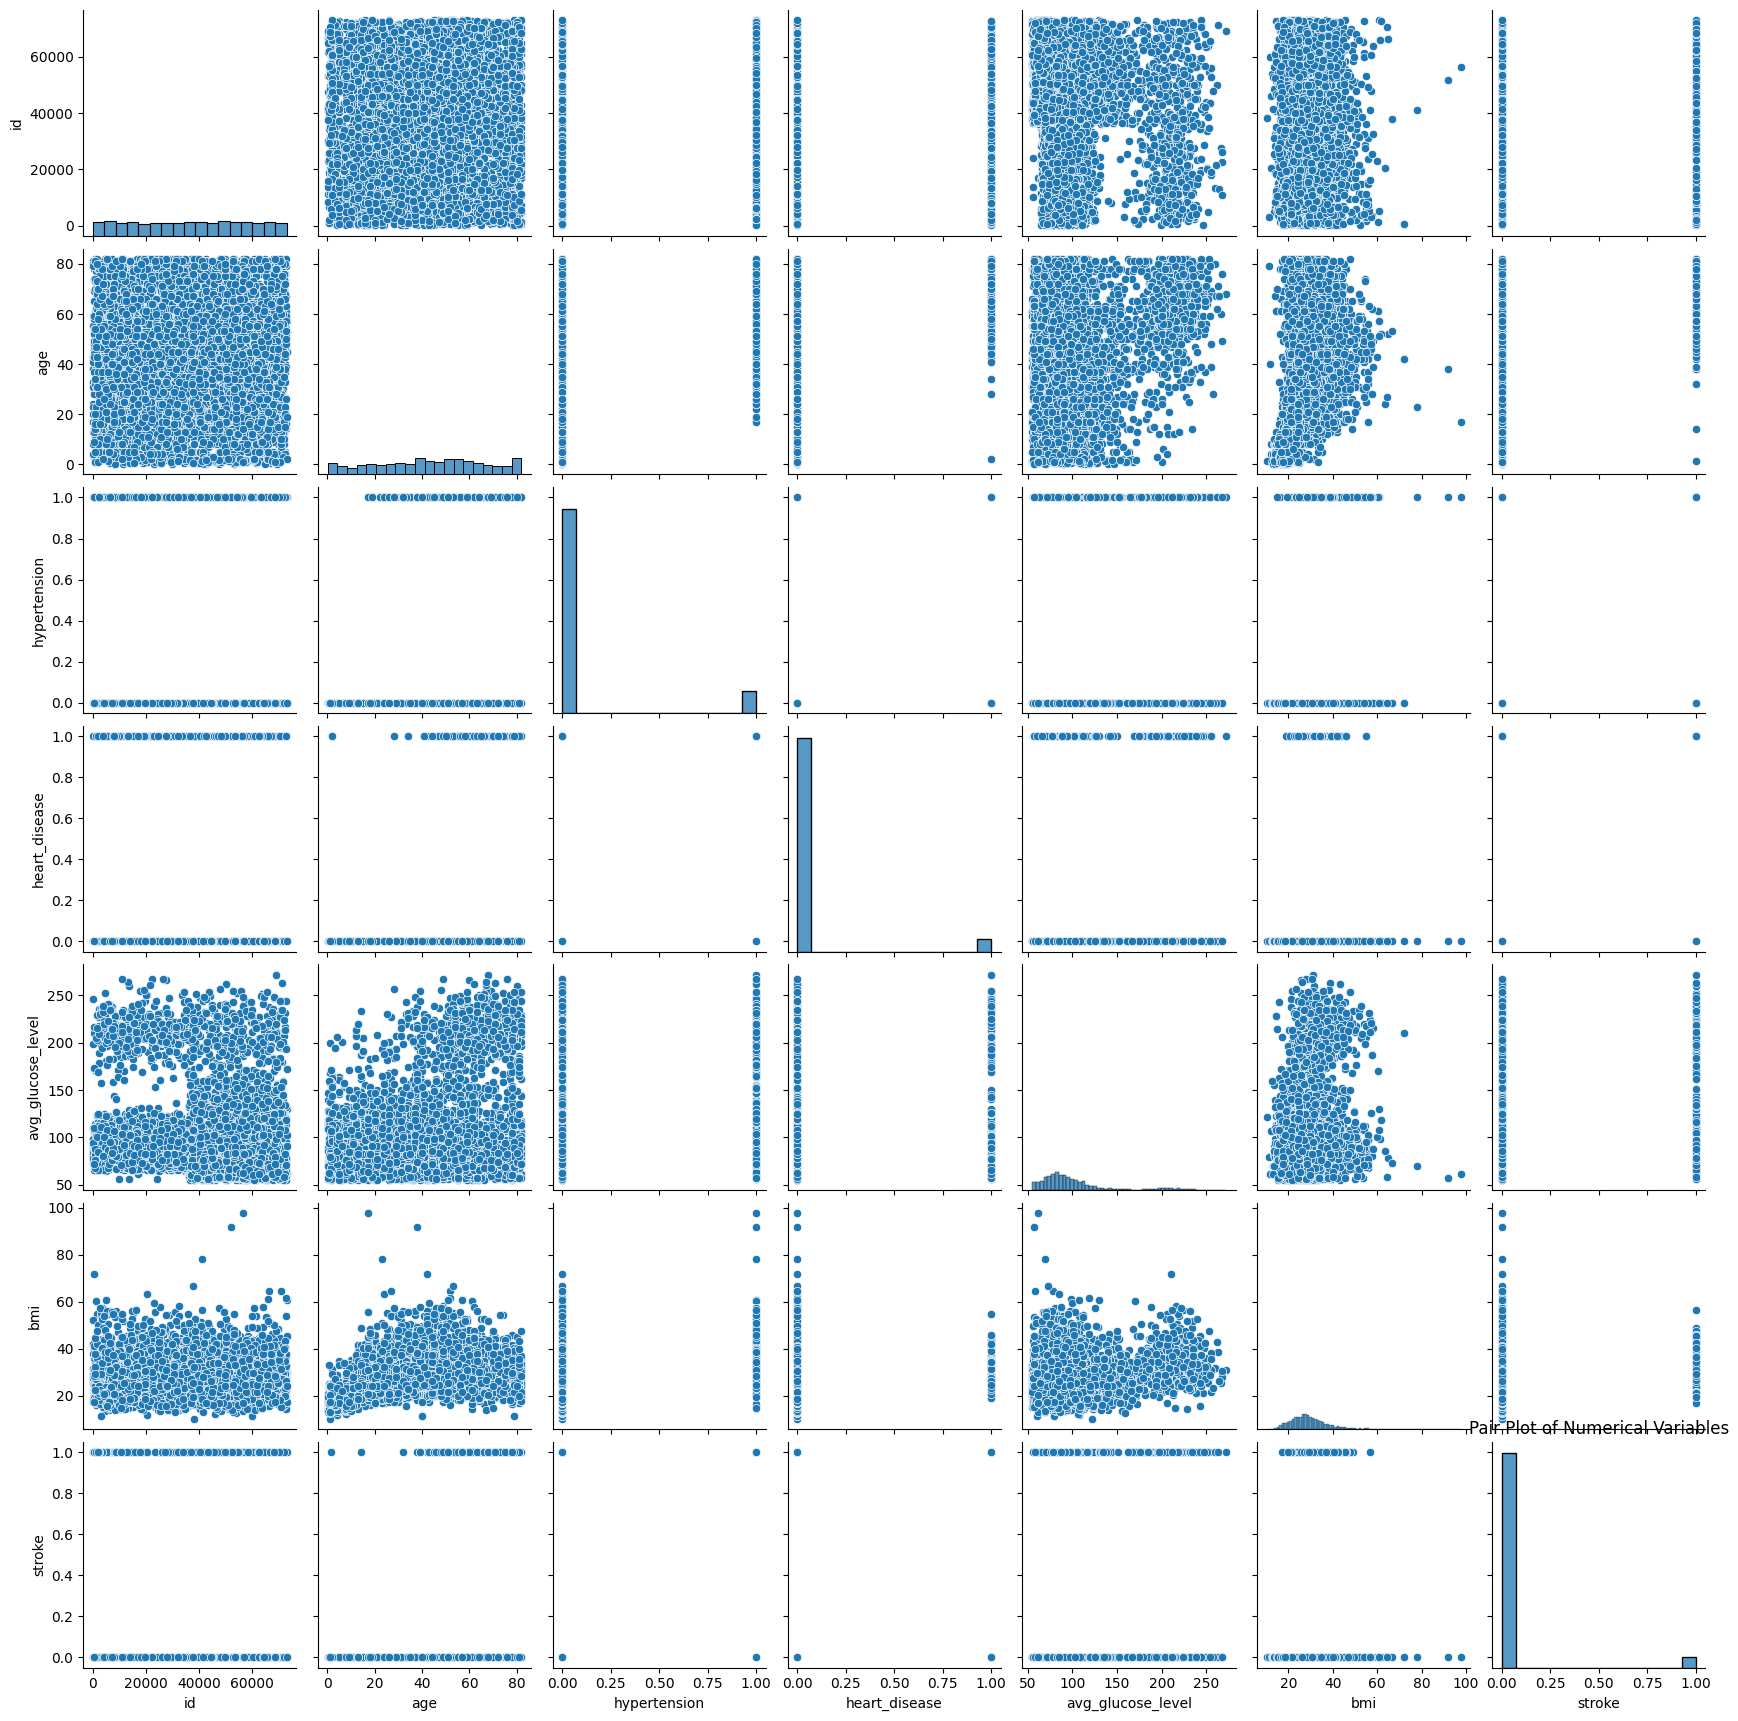

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.title('Pair Plot of Numerical Variables')
plt.show

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Cleaning the Data

# Handling Mising Values

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There is 201 null value in bmi

cheack if there is oultlier or not

In [ ]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
fig=px.box(df,x=['bmi'])
fig.show()

since there are outliers in bmi, so we can't replace the missing values with the mean , we should remove outliers then we can replace it with the mean

Drpping Unnecessary Fetures



In [ ]:
df.drop(columns=['id'],axis=1,inplace=True)

In [ ]:
df.shape

(5110, 11)

# Handling Outliers

In [ ]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [ ]:
fig=px.box(df,x=['age'])
fig.show()

In [ ]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
fig=px.box(df,x=['bmi'])
fig.show()

In [ ]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
fig=px.box(df,x=['avg_glucose_level'])
fig.show()

Outliers are present in both bmi and avg_glucose_level

In [ ]:
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1

In [ ]:
q1,q3,iqr

(23.5, 33.1, 9.600000000000001)

In [ ]:
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)

In [ ]:
upper

47.5

In [ ]:
lower

9.099999999999998

In [ ]:
outliers=df.loc[ ( (df['bmi']>upper) | (df['bmi']<lower)) ]

In [ ]:
len(outliers)

110

In [ ]:
len(df)

5110

In [ ]:
new_def=df.copy()

In [ ]:
new_def.loc[((df['bmi'] >upper),'bmi')]=upper

In [ ]:
new_def.loc[((df['bmi'] <lower),'bmi')]=lower

In [ ]:
len(new_def)

5110

In [ ]:
q1=df['avg_glucose_level'].quantile(0.25)
q3=df['avg_glucose_level'].quantile(0.75)
iqr=q3-q1

In [ ]:
q1,q3,iqr

(77.245, 114.09, 36.845)

In [ ]:
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)

In [ ]:
upper

169.35750000000002

In [ ]:
lower

21.977500000000006

In [ ]:
outliers=df.loc[ ( (df['avg_glucose_level']>upper) | (df['avg_glucose_level']<lower)) ]

In [ ]:
len(outliers)

627

In [ ]:
new_def.loc[((df['avg_glucose_level'] >upper),'avg_glucose_level')]=upper

In [ ]:
new_def.loc[((df['avg_glucose_level'] <lower),'avg_glucose_level')]=lower

In [ ]:
len(new_def)

5110

In [ ]:
fig=px.box(new_def,x=['avg_glucose_level'])
fig.show()

In [ ]:
fig=px.box(new_def,x=['bmi'])
fig.show()

# *Handling Missing Values*

In [ ]:
new_def.fillna(new_def["bmi"].mean(),inplace=True)

# Analyzing Numerical Variables

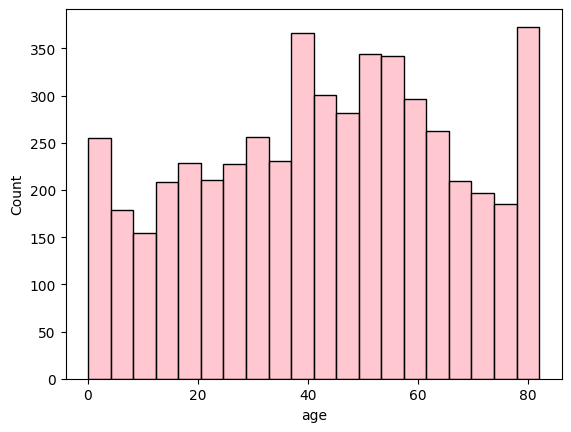

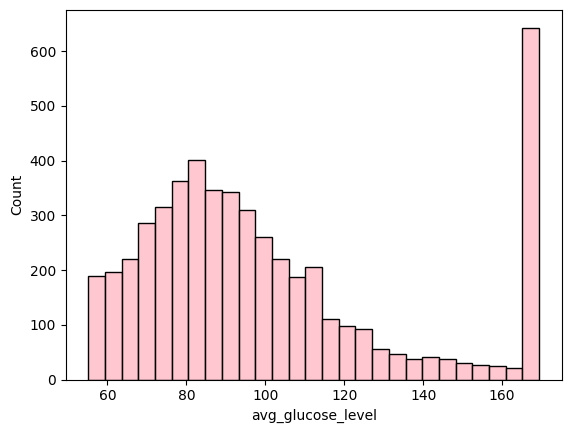

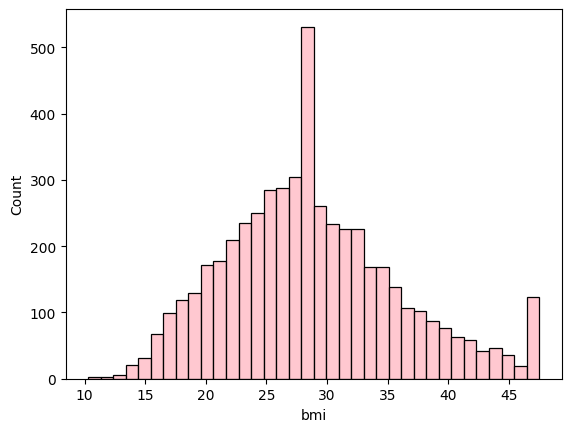

In [ ]:
Num_cols = new_def.select_dtypes(include=['float'])
for col in Num_cols:
    sns.histplot(x=new_def[col], data=new_def, color="lightpink")
    plt.show(block=True)

# Analyzing Categorical Variables

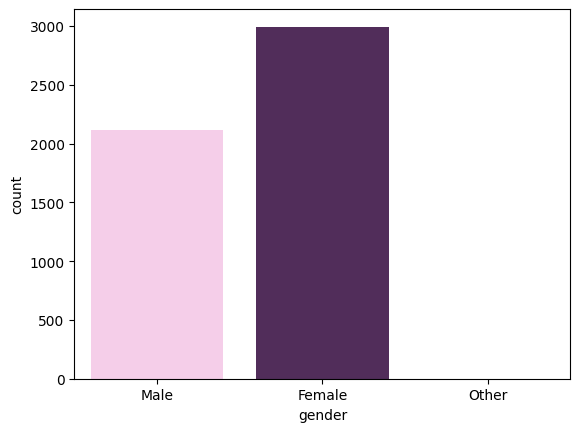

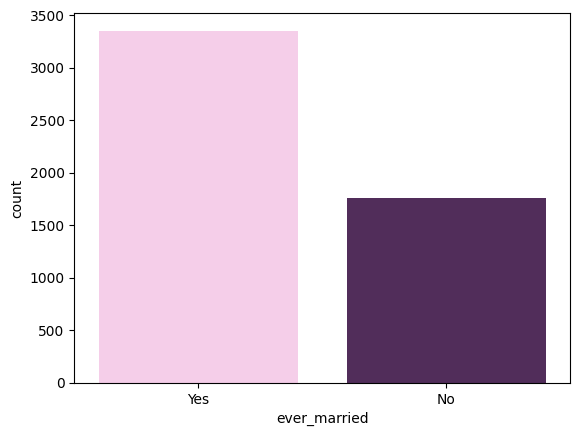

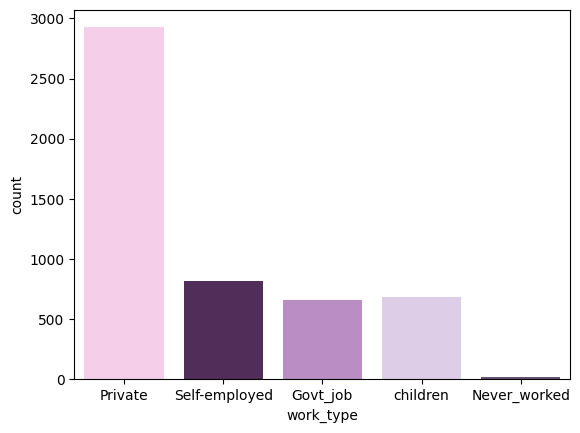

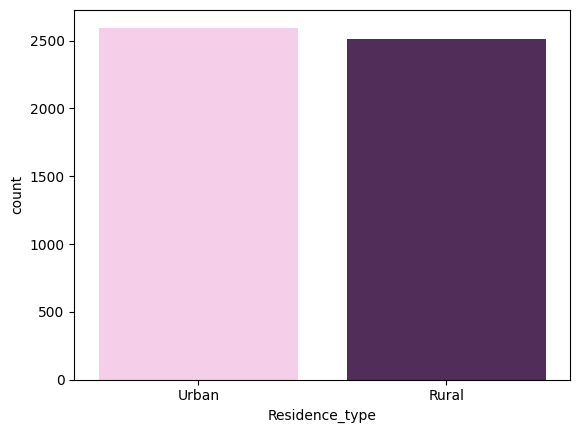

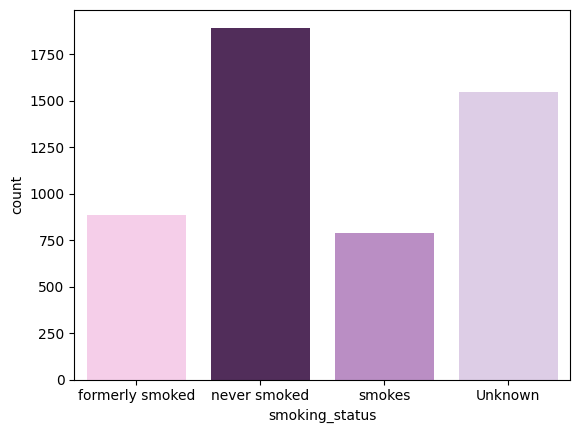

In [ ]:
category_cols = new_def.select_dtypes(include=['object'])
for col in category_cols.columns:
    sns.countplot(data=new_def, x=col, palette=["#fcc7eb","#562661","#bf85cd","#dec9ea","#684b79"])
    plt.show(block=True)

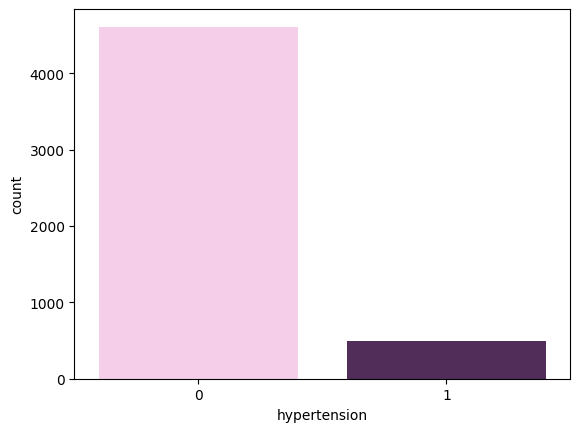

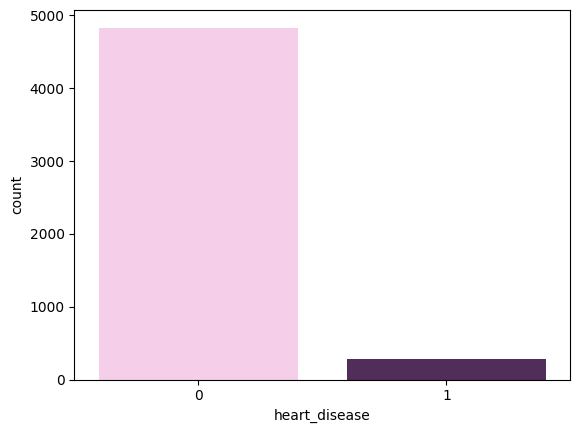

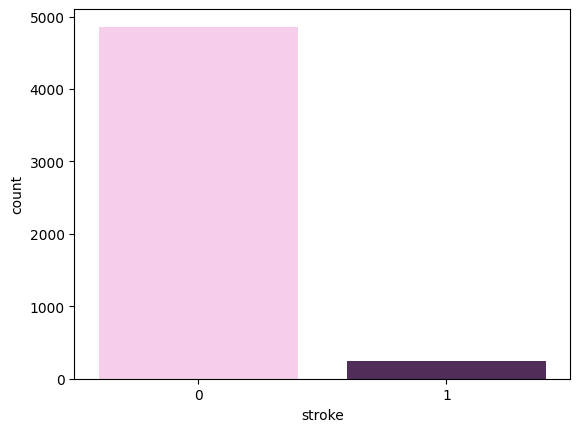

In [ ]:
category_cols = new_def.select_dtypes(include=['int'])

for col in category_cols.columns:
    sns.countplot(data=new_def, x=col, palette=["#fcc7eb","#562661"])
    plt.show(block=True)

## Handling Numerical and Categorical Fetures

Gender

In [ ]:
new_def['gender'].value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
new_def.drop(new_def[new_def['gender'] == 'Other'].index[0], inplace=True)


In [ ]:
new_def['gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

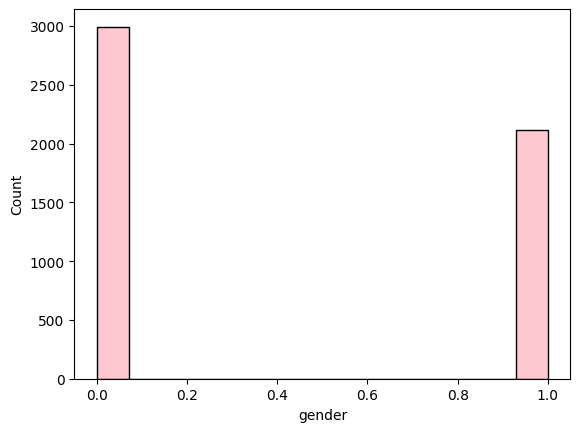

In [ ]:
sns.histplot(x=new_def['gender'], data=new_def, color="lightpink")
plt.show(block=True)

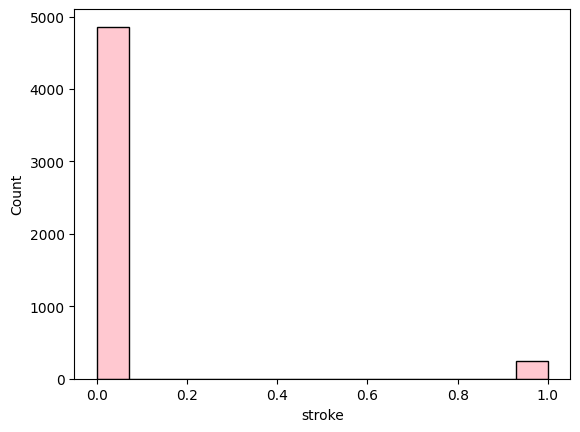

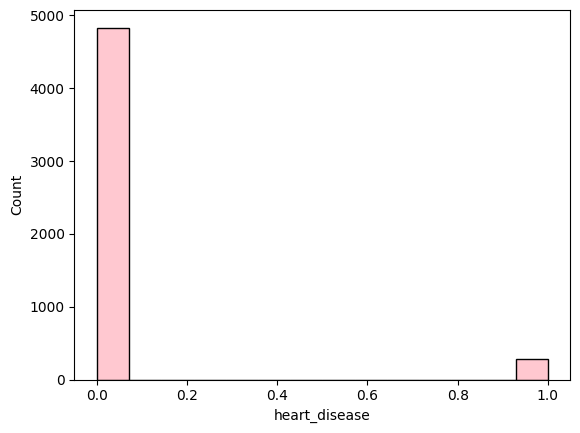

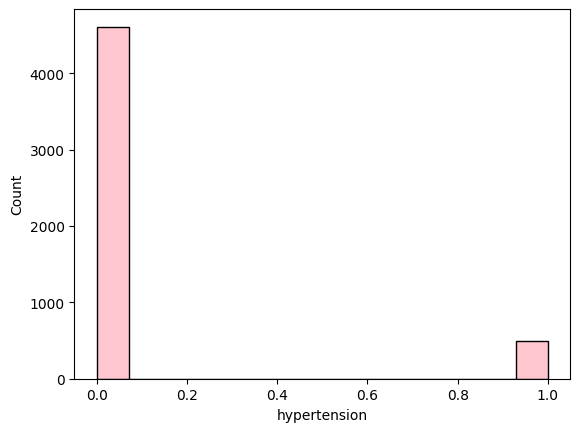

In [ ]:
features = ['stroke', 'heart_disease', 'hypertension']

# Function to create histogram for a feature
def plot_histogram(data, feature, color):
    sns.histplot(x=data[feature], data=data, color=color)
    plt.show(block=True)

# Call the function in a loop for each feature
for feature in features:
    plot_histogram(new_def, feature, "lightpink")


Ever Married

In [ ]:
new_def['ever_married'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
new_def['ever_married'].value_counts()

1    3353
0    1756
Name: ever_married, dtype: int64

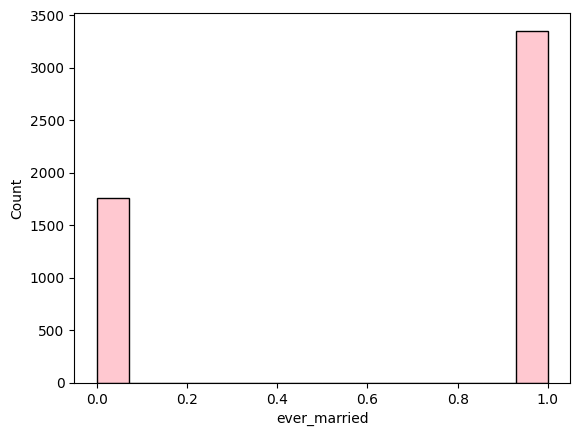

In [ ]:
sns.histplot(x=new_def['ever_married'], data=new_def, color="lightpink")
plt.show(block=True)

Residence Type

In [ ]:
new_def['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [ ]:
new_def['Residence_type'].replace(['Urban', 'Rural'], [1, 0], inplace=True)


In [ ]:
new_def['Residence_type'].value_counts()

1    2596
0    2513
Name: Residence_type, dtype: int64

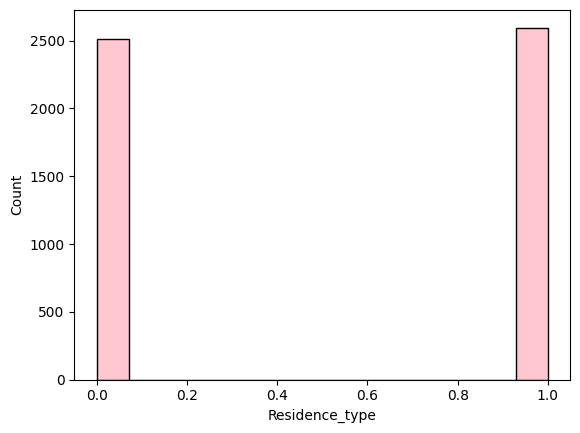

In [ ]:
sns.histplot(x=new_def['Residence_type'], data=new_def, color="lightpink")
plt.show(block=True)

Smoking Status

In [ ]:
new_def['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

using one-hot encoding

 Work Type

In [ ]:
new_def['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

using one-hot encoding

In [ ]:
new_def= pd.get_dummies(new_def, columns = ['work_type'])

In [ ]:
new_def.head(2)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,169.3575,36.600000,formerly smoked,1,0,0,1,0,0
1,0,61.0,0,0,1,0,169.3575,28.743512,never smoked,1,0,0,0,1,0


Deleting unneccery features like work_type_Never_Worked ,since it has just
22 samples out of 5110

In [ ]:
# Drop the rows where 'work_type_Never_worked' is 1
new_def = new_def[new_def['work_type_Never_worked'] != 1]

# Drop the 'work_type_Never_worked' feature column
new_def = new_def.drop('work_type_Never_worked', axis=1)

In [ ]:

new_def.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   5087 non-null   int64  
 1   age                      5087 non-null   float64
 2   hypertension             5087 non-null   int64  
 3   heart_disease            5087 non-null   int64  
 4   ever_married             5087 non-null   int64  
 5   Residence_type           5087 non-null   int64  
 6   avg_glucose_level        5087 non-null   float64
 7   bmi                      5087 non-null   float64
 8   smoking_status           5087 non-null   object 
 9   stroke                   5087 non-null   int64  
 10  work_type_Govt_job       5087 non-null   uint8  
 11  work_type_Private        5087 non-null   uint8  
 12  work_type_Self-employed  5087 non-null   uint8  
 13  work_type_children       5087 non-null   uint8  
dtypes: float64(3), int64(6),

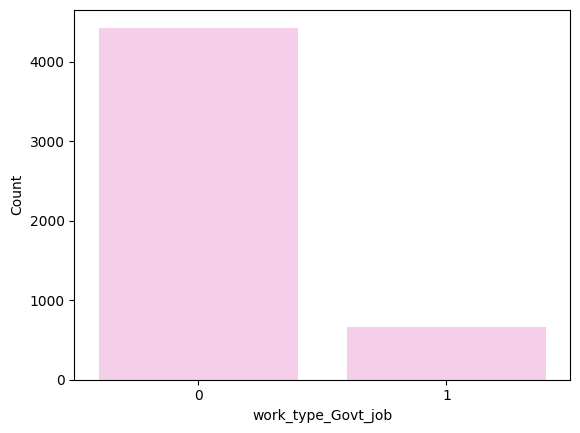

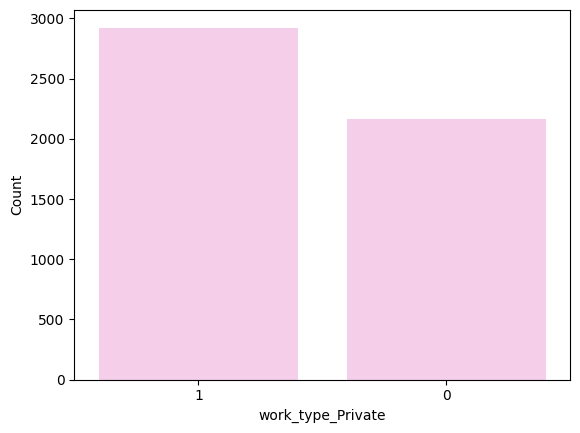

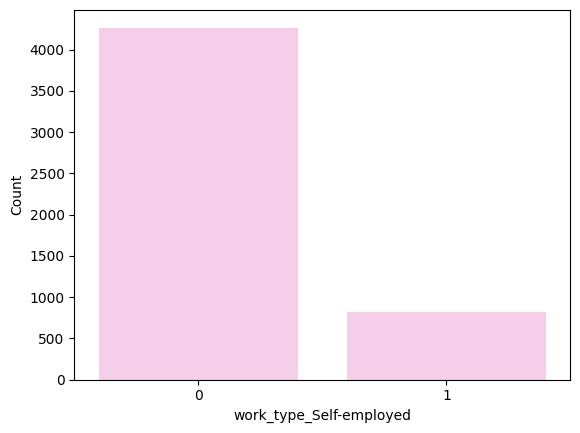

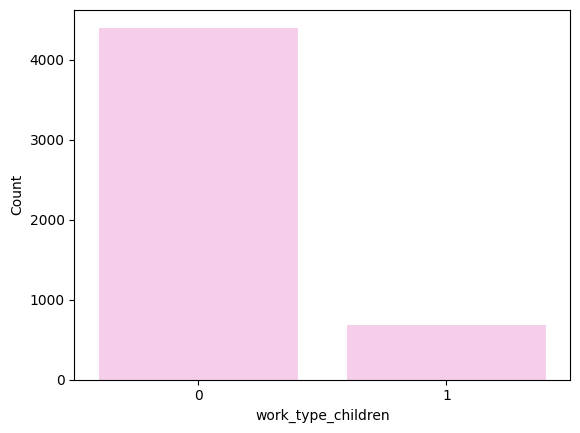

In [ ]:
sns.set_palette('magma')
for col in new_def.columns:
     if 'work_type' in col:
        sns.countplot(data=new_def, x=col,palette=["#fcc7eb","#fcc7eb"], order=new_def[col].value_counts().index)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

smoking status

In [ ]:
new_def= pd.get_dummies(new_def, columns = ['smoking_status'])

In [ ]:
new_def.head(2)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,169.3575,36.600000,1,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,169.3575,28.743512,1,0,0,1,0,0,0,1,0


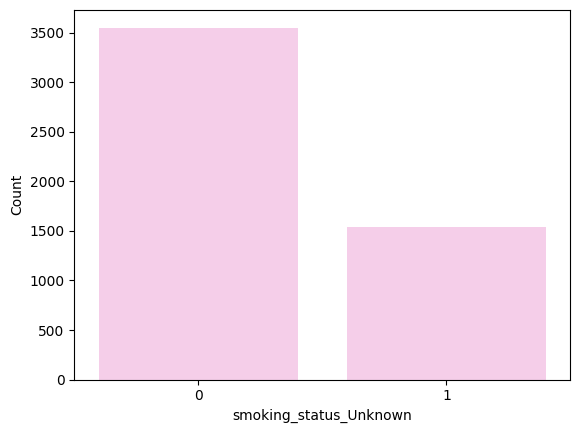

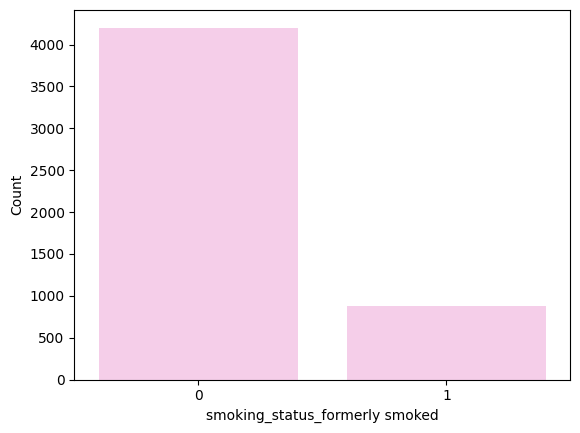

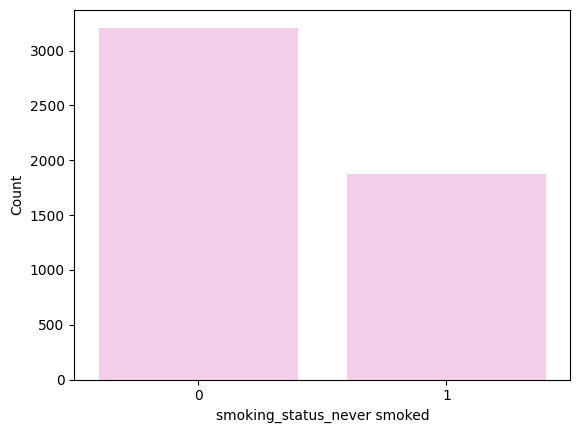

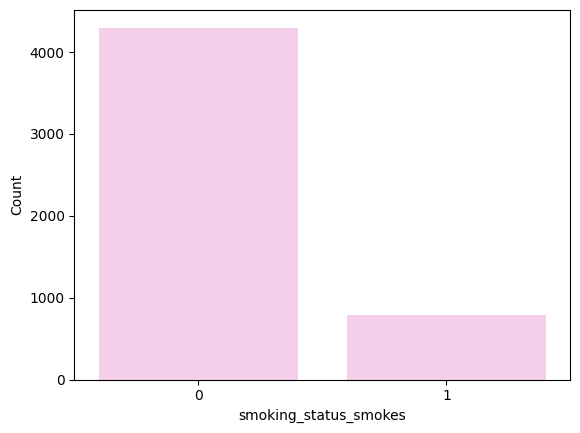

In [ ]:
sns.set_palette('magma')
for col in new_def.columns:
     if 'smoking_status' in col:
        sns.countplot(data=new_def, x=col,palette=["#fcc7eb","#fcc7eb"], order=new_def[col].value_counts().index)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

In [ ]:
new_def.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5087 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5087 non-null   int64  
 1   age                             5087 non-null   float64
 2   hypertension                    5087 non-null   int64  
 3   heart_disease                   5087 non-null   int64  
 4   ever_married                    5087 non-null   int64  
 5   Residence_type                  5087 non-null   int64  
 6   avg_glucose_level               5087 non-null   float64
 7   bmi                             5087 non-null   float64
 8   stroke                          5087 non-null   int64  
 9   work_type_Govt_job              5087 non-null   uint8  
 10  work_type_Private               5087 non-null   uint8  
 11  work_type_Self-employed         5087 non-null   uint8  
 12  work_type_children              50

# Scaling Features:Age,Avg-Glucose,BMI

In [ ]:
continuous_columns = ['avg_glucose_level', 'bmi', 'age']

scaler = MinMaxScaler()
new_def[continuous_columns] = scaler.fit_transform(new_def[continuous_columns])


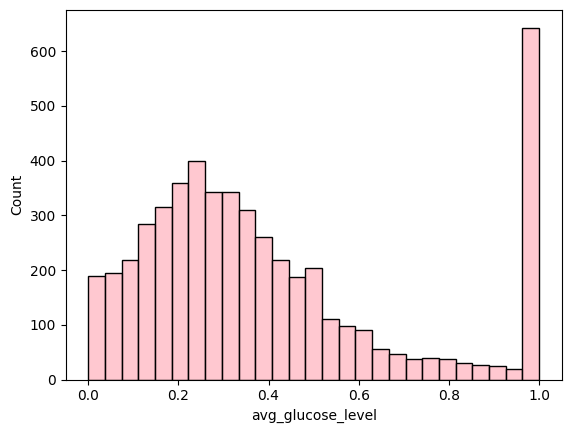

In [ ]:
sns.histplot(x=new_def['avg_glucose_level'], data=new_def, color="lightpink")
plt.show(block=True)

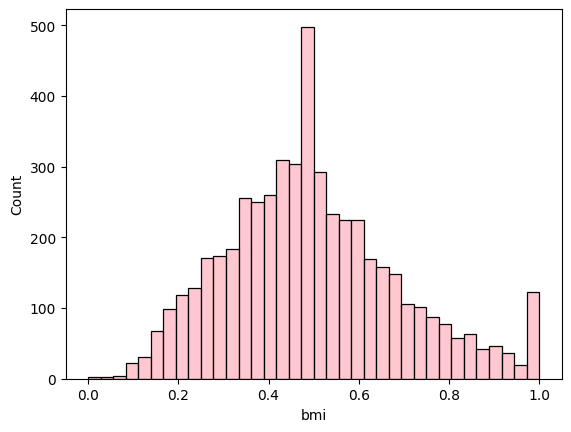

In [ ]:
sns.histplot(x=new_def['bmi'], data=new_def, color="lightpink")
plt.show(block=True)

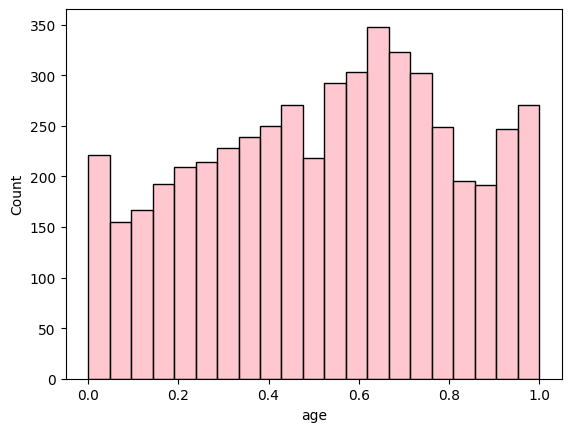

In [ ]:
sns.histplot(x=new_def['age'], data=new_def, color="lightpink")
plt.show(block=True)

Handling Unbalanced dataset

In [ ]:
new_def['stroke'].value_counts()


0    4838
1     249
Name: stroke, dtype: int64

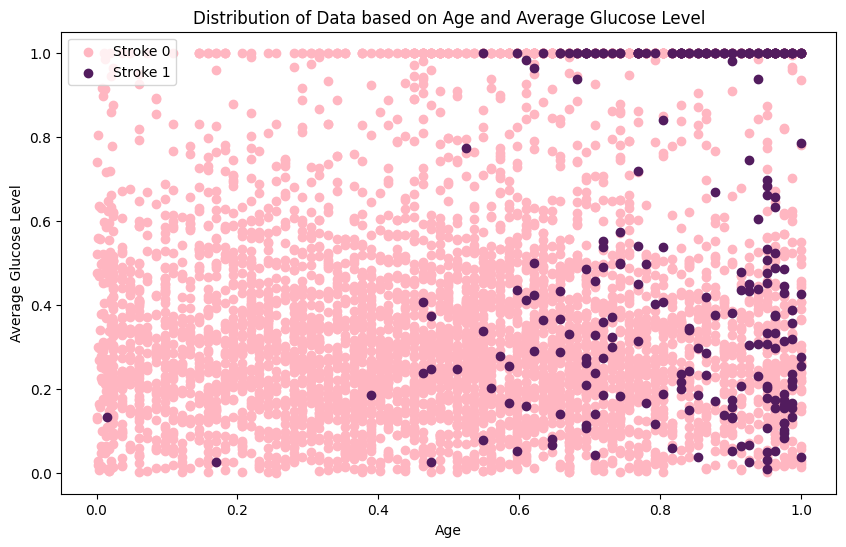

In [ ]:
# Separate the data based on the stroke target attribute
stroke_0 = new_def[new_def['stroke'] == 0]
stroke_1 = new_def[new_def['stroke'] == 1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(stroke_0['age'], stroke_0['avg_glucose_level'], color='lightpink', label='Stroke 0')
plt.scatter(stroke_1['age'], stroke_1['avg_glucose_level'], color='#521c5e', label='Stroke 1')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Distribution of Data based on Age and Average Glucose Level')
plt.legend()
plt.show()

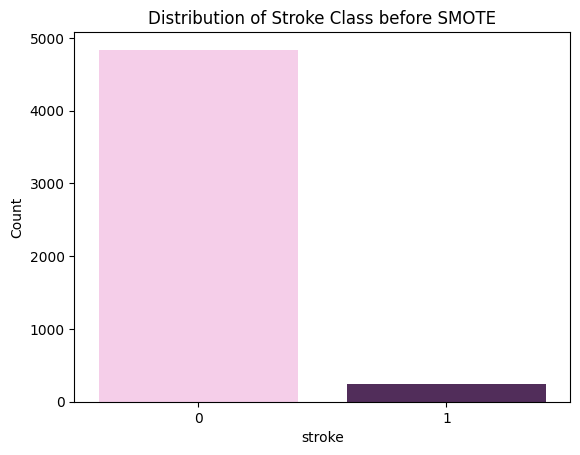

In [ ]:
sns.set_palette('magma')
# Plot count plot for 'stroke' attribute
sns.countplot(data=new_def, x='stroke',palette=["#fcc7eb","#562661"])
plt.xlabel('stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke Class before SMOTE')
plt.show()

In [ ]:
X = new_def.drop(columns=['stroke'])
y = new_def['stroke']

In [ ]:
# Create an instance of SMOTE
smote = SMOTE()
# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

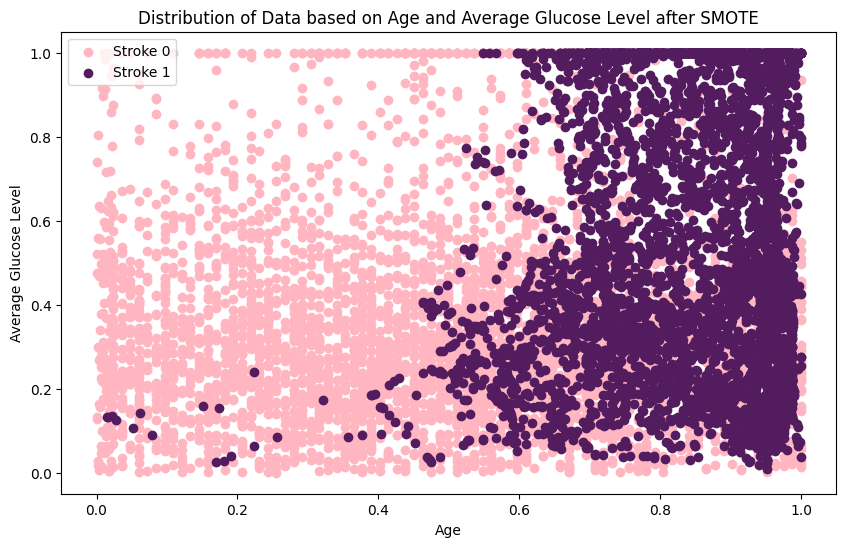

In [ ]:

# Separate the data based on the stroke target attribute
stroke_0 = X_resampled[y_resampled == 0]
stroke_1 = X_resampled[y_resampled == 1]
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(stroke_0['age'], stroke_0['avg_glucose_level'], color='lightpink', label='Stroke 0')
plt.scatter(stroke_1['age'], stroke_1['avg_glucose_level'], color='#521c5e', label='Stroke 1')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Distribution of Data based on Age and Average Glucose Level after SMOTE')
plt.legend()
plt.show()

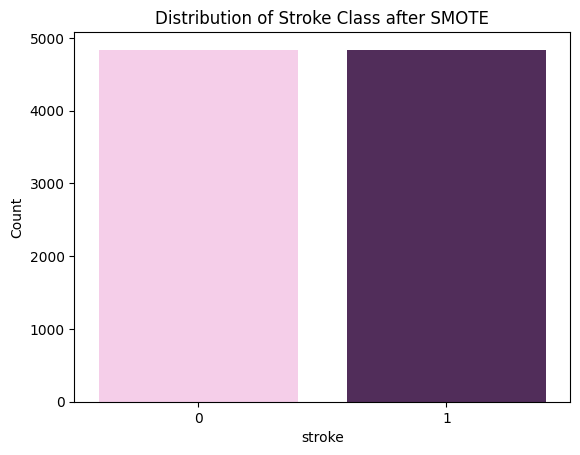

In [ ]:
sns.set_palette('magma')
# Plot count plot for 'stroke' attribute
sns.countplot(data=new_def, x=y_resampled,palette=["#fcc7eb","#562661"])
plt.xlabel('stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke Class after SMOTE')
plt.show()

In [ ]:
print("Original set size:", len(X))
print("Resampled set size:", len(X_resampled))

Original set size: 5087
Resampled set size: 9676


Splitting the data into train, validation, and test sets




In [ ]:
# First Split: 80% Training, 20% Temporary (for Test and Validation)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, train_size=0.8,random_state=42,stratify=y_resampled)

# Second Split: Divide the Temporary set into Test and Validation (50% each of the Temporary set)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,random_state=42,stratify=y_temp)


In [ ]:
y_resampled.value_counts()

1    4838
0    4838
Name: stroke, dtype: int64

In [ ]:
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 7740
Validation set size: 968
Test set size: 968


In [ ]:
print("\nClass distribution in Training set:", np.bincount(y_train))
print("Class distribution in Validation set:", np.bincount(y_val))
print("Class distribution in Test set:", np.bincount(y_test))


Class distribution in Training set: [3870 3870]
Class distribution in Validation set: [484 484]
Class distribution in Test set: [484 484]


In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((7740, 16), (968, 16), (968, 16), (7740,), (968,), (968,))

Visualizing Distribution of Target across Train, Validation, and Test sets

In [ ]:
df_train = pd.DataFrame(X_train, columns=new_def.columns)
df_train['set'] = 'train'
df_train['target'] = y_train

df_val = pd.DataFrame(X_val, columns=new_def.columns)
df_val['set'] = 'val'
df_val['target'] = y_val

df_test = pd.DataFrame(X_test, columns=new_def.columns)
df_test['set'] = 'test'
df_test['target'] = y_test

In [ ]:
df_combined = pd.concat([df_train, df_val, df_test])

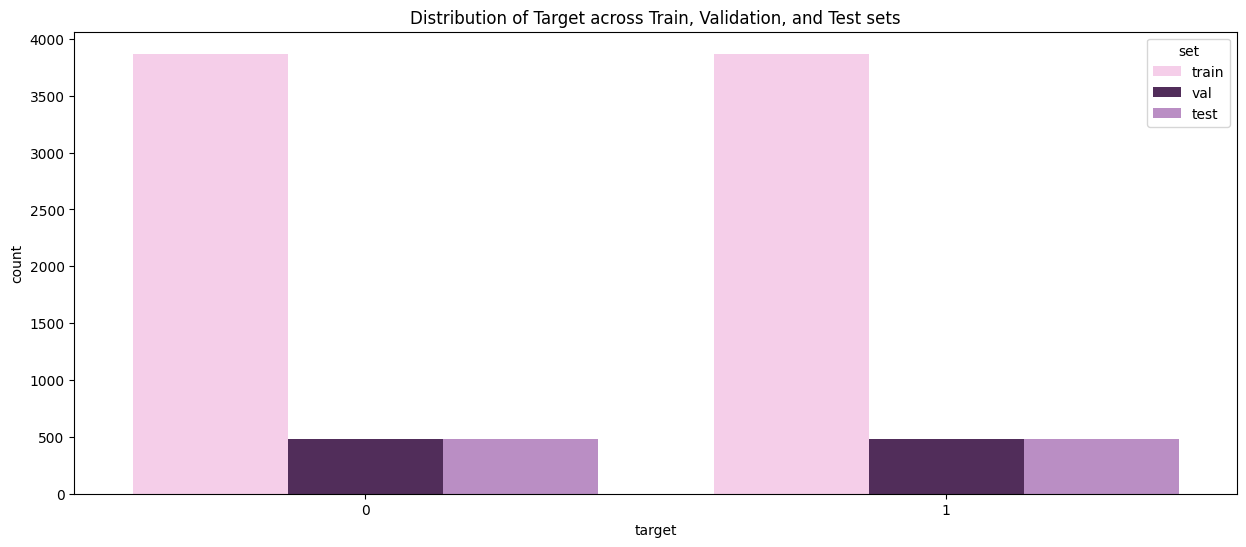

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_combined, x='target', palette=["#fcc7eb","#562661","#bf85cd"], hue='set')
plt.title('Distribution of Target across Train, Validation, and Test sets')
plt.show()

In [ ]:
 y_test.shape

(968,)

GridSearch to choose the best parameter in KNN



In [ ]:
model = KNeighborsClassifier()
parameters = {'n_neighbors': [1, 3, 5, 7, 9]}
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_



{'n_neighbors': 1}

GridSearch to choose the best parameters in DTC

In [ ]:

model = DecisionTreeClassifier()
parameters = {'criterion': ['entropy', 'gini']}
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy'}

GridSearch to choose the best parameter in RFC

In [ ]:
model = RandomForestClassifier(random_state=42)  # Use Random Forest Classifier
parameters = {'criterion': ['gini', 'entropy']}  # Adjust parameters for RFC
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini'}

GridSearch to choose the best parameter in SVC

In [ ]:
model = SVC()
parameters = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}
grid = GridSearchCV(estimator=model,param_grid=parameters,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'C': 1000, 'gamma': 1}

Models Trainig

In [ ]:
models = { "RFC":RandomForestClassifier(criterion='gini'), "Logistic Regression": LogisticRegression(random_state=42)
, "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=1), "XGBoost": XGBClassifier()
,"SVM":SVC(C= 1000, gamma= 1,probability= True),"Decision tree":DecisionTreeClassifier(criterion='entropy')
,"Naive Bayes(gaussin NB)" :GaussianNB()}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name,"trained")


RFC trained
Logistic Regression trained
K-Nearest Neighbors trained
XGBoost trained
SVM trained
Decision tree trained
Naive Bayes(gaussin NB) trained


Accuracy Calculation

In [ ]:
train_accuracy_scores = []
val_accuracy_scores = []
test_accuracy_scores = []
for name, model in models.items():
# Calculate the accuracy of training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    train_accuracy_scores.append(train_accuracy)
    train_precision = precision_score(y_train, y_train_pred) * 100
    train_recall = recall_score(y_train, y_train_pred) * 100
    train_f1 = f1_score(y_train, y_train_pred) * 100

    print(name,"Training Accuracy:{:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
        .format(train_accuracy, train_precision, train_recall, train_f1))

# Calculate the accuracy of validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)*100
    val_accuracy_scores.append(val_accuracy)
    val_precision = precision_score(y_val, y_val_pred) * 100
    val_recall = recall_score(y_val, y_val_pred) * 100
    val_f1 = f1_score(y_val, y_val_pred) * 100
    print(name, "Validation Accuracy:{:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
       .format(val_accuracy, val_precision, val_recall,val_f1))

# Calculate the accuracy of test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)*100
    test_accuracy_scores.append(test_accuracy)
    test_precision = precision_score(y_test, y_test_pred) * 100
    test_recall = recall_score(y_test, y_test_pred) * 100
    test_f1 = f1_score(y_test, y_test_pred) * 100
    print(name,"Test Accuracy:{:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
       .format(test_accuracy, test_precision, test_recall,test_f1))

print("Training Accuracy Scores:", train_accuracy_scores)
print("Validation Accuracy Scores:", val_accuracy_scores)
print("Test Accuracy Scores:", test_accuracy_scores)

RFC Training Accuracy:100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

RFC Validation Accuracy:90.599%
				Precision: 87.006%
				   Recall: 95.455%
				 F1-Score: 91.034%

RFC Test Accuracy:92.149%
				Precision: 88.636%
				   Recall: 96.694%
				 F1-Score: 92.490%

Logistic Regression Training Accuracy:80.052%
				Precision: 77.429%
				   Recall: 84.832%
				 F1-Score: 80.962%

Logistic Regression Validation Accuracy:77.893%
				Precision: 74.908%
				   Recall: 83.884%
				 F1-Score: 79.142%

Logistic Regression Test Accuracy:79.545%
				Precision: 76.287%
				   Recall: 85.744%
				 F1-Score: 80.739%

K-Nearest Neighbors Training Accuracy:100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

K-Nearest Neighbors Validation Accuracy:89.463%
				Precision: 84.854%
				   Recall: 96.074%
				 F1-Score: 90.116%

K-Nearest Neighbors Test Accuracy:89.876%
				Precision: 85.478%
				   Recall: 96.074%
				 F1-Score: 90.467%

XG

confusion matrix

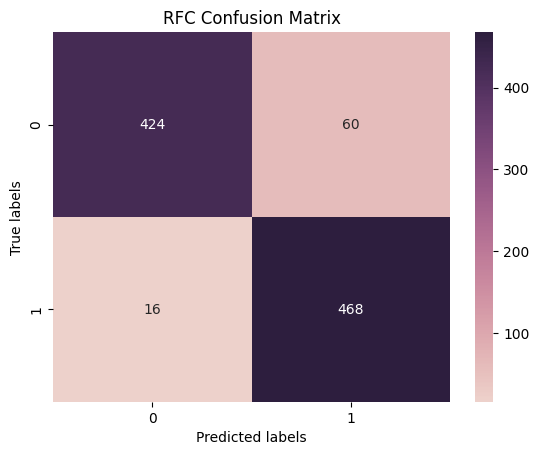

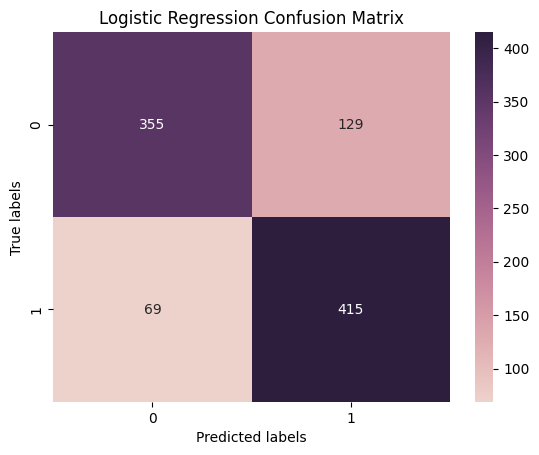

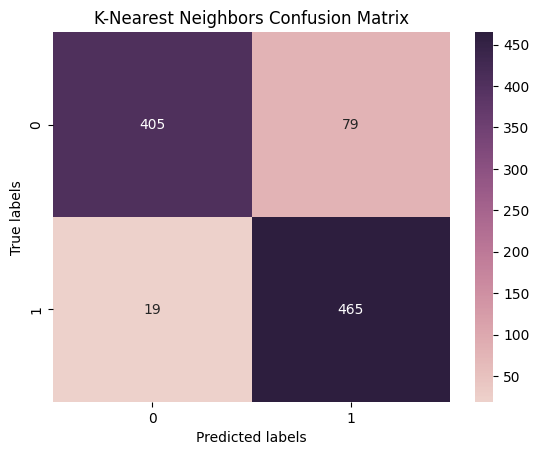

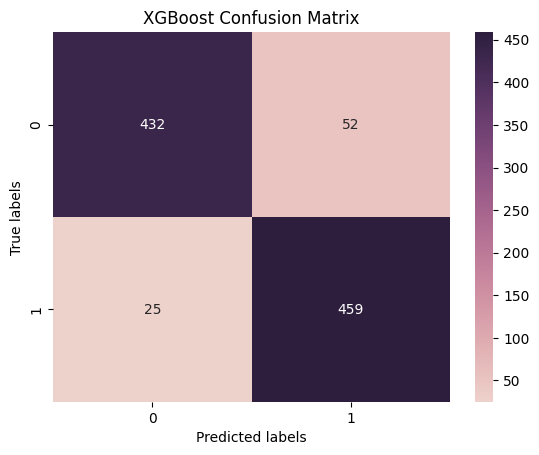

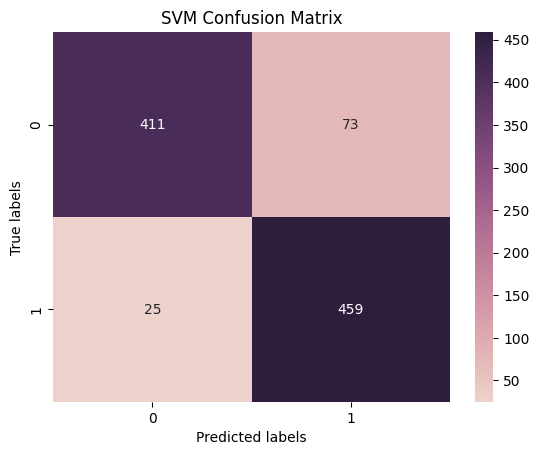

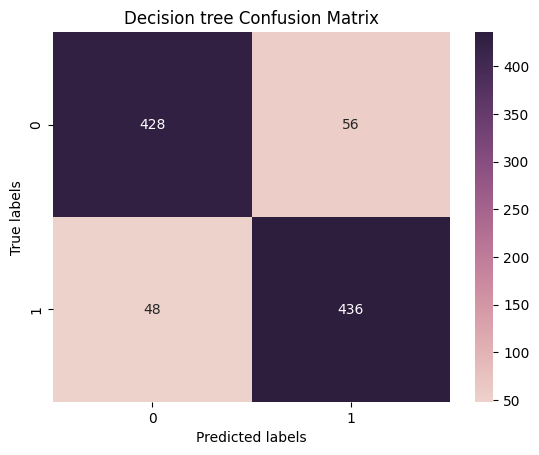

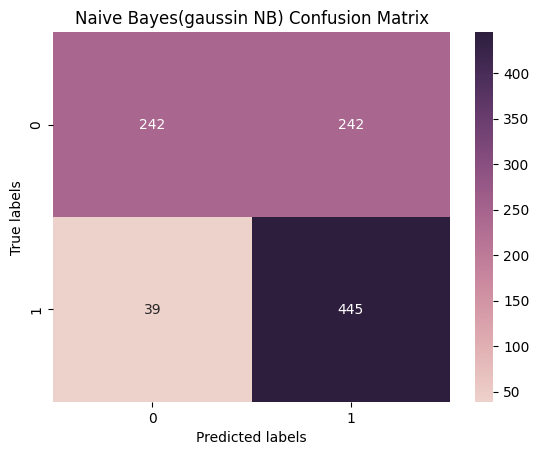

In [ ]:
    for name, model in models.items():
        y_test_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_test_pred)
        ax = plt.subplot()
        sns.heatmap(cm, annot=True, ax=ax, cmap=sns.cubehelix_palette(as_cmap=True), fmt='g')
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(name +' Confusion Matrix')
        plt.show()

ROC graph

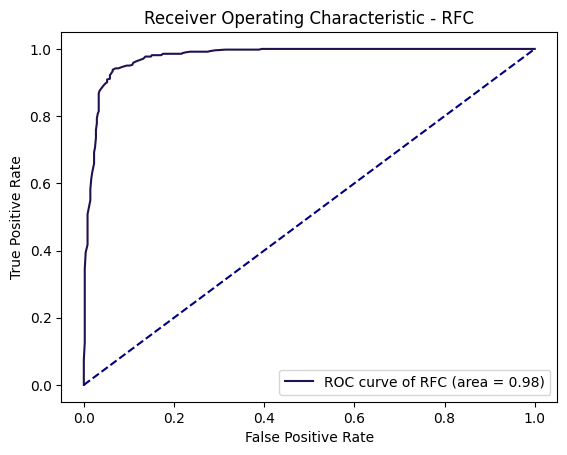

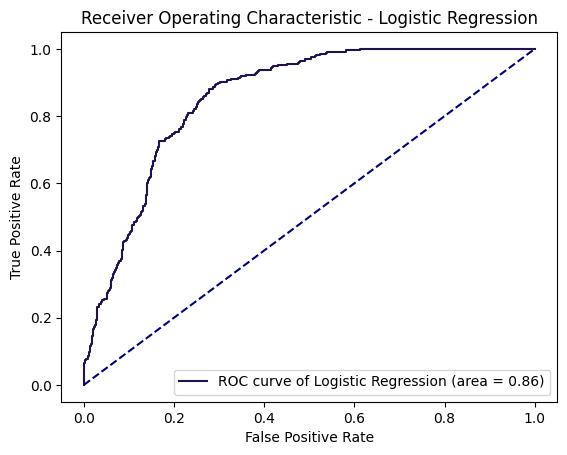

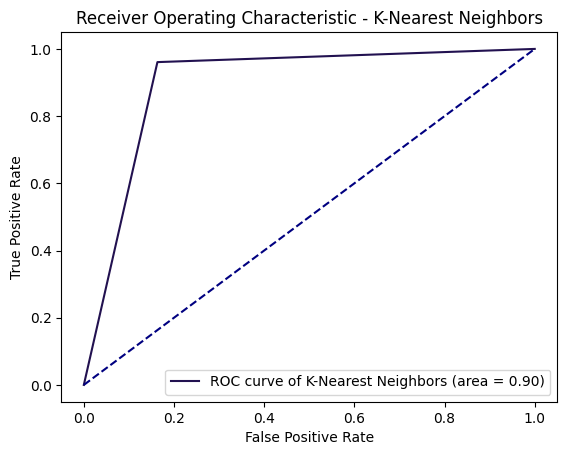

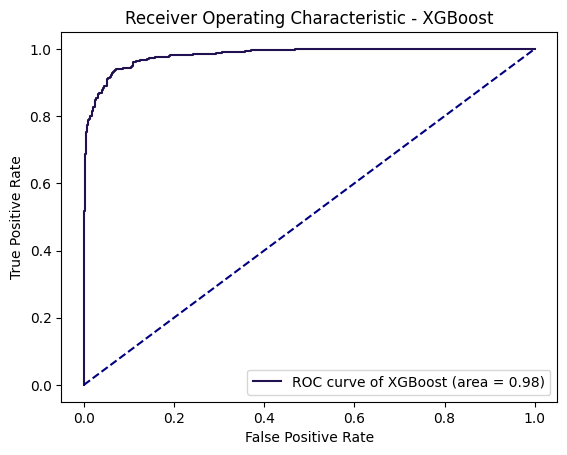

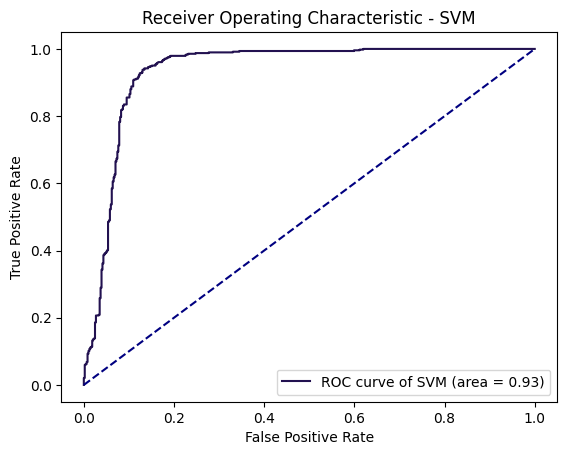

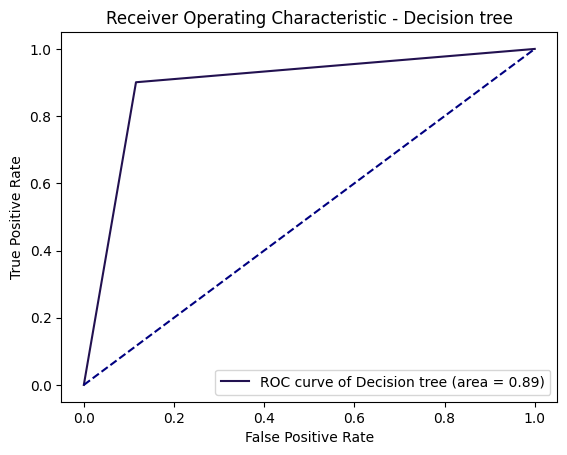

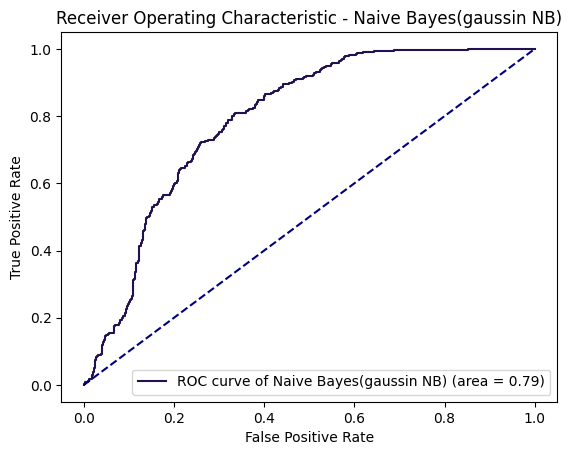

In [ ]:
for name, model in models.items():
    # Get probability scores
    y_scores = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve of {name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {name}')
    plt.legend(loc="lower right")
    plt.show()

merge them in same graph

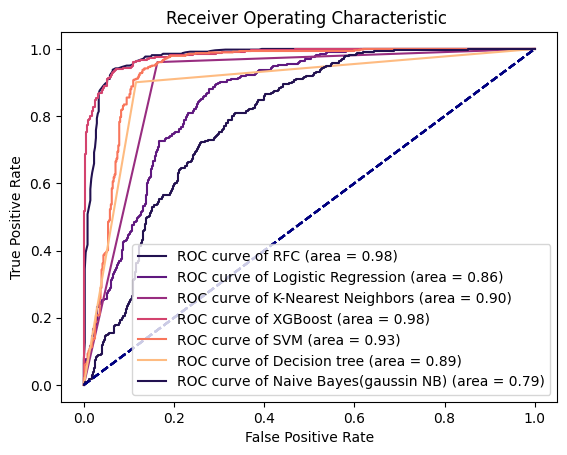

In [ ]:
plt.figure()
for name, model in models.items():
    # Get probability scores
    y_scores = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve

    plt.plot(fpr, tpr, label=f'ROC curve of {name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic ')
plt.legend(loc="lower right")
plt.show()

Error Rate Calculation

Error Rate for RFC: 7.85%
Error Rate for Logistic Regression: 20.45%
Error Rate for K-Nearest Neighbors: 10.12%
Error Rate for XGBoost: 7.95%
Error Rate for SVM: 10.12%
Error Rate for Decision tree: 10.74%
Error Rate for Naive Bayes(gaussin NB): 29.03%


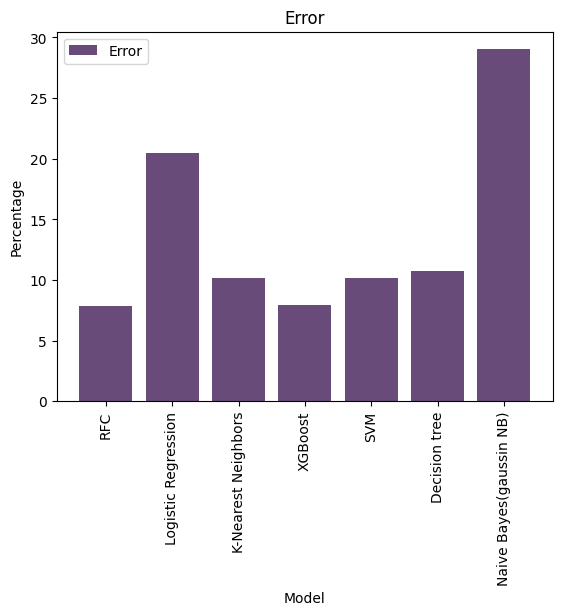

In [ ]:
error_scores = [100 - accuracy for accuracy in test_accuracy_scores]
for model_name, error_rate in zip(models.keys(), error_scores):
    print(f"Error Rate for {model_name}: {error_rate:.2f}%")
plt.bar(models.keys(), error_scores, label='Error', color='#684b79')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Error')
plt.xticks(rotation=90)
plt.legend()
plt.show()

plot the model accuracy graph

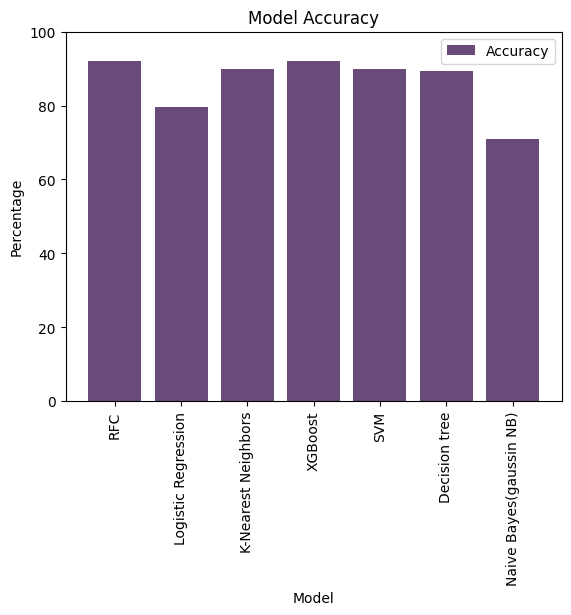

In [ ]:
plt.bar(models.keys(),  test_accuracy_scores, label='Accuracy', color='#684b79')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, shuffle=True, stratify=y_resampled)

In [ ]:
Kmodels = { "RFC":RandomForestClassifier(criterion='entropy'), "Logistic Regression": LogisticRegression(random_state=42), "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=1), "XGBoost": XGBClassifier(),"SVM":SVC(C= 1000, gamma= 1),"Decision tree":DecisionTreeClassifier(criterion='entropy'),"Naive Bayes(gaussin NB)" :GaussianNB()}
for name, model in Kmodels.items():
    model.fit(X_train, y_train)


10-fold cross validation

In [ ]:
cv_results = []

# Initialize lists to hold test set evaluation results
test_results = []
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Perform cross-validation and evaluate on the test set
for name, model in Kmodels.items():
    # Perform 10-Fold Cross-Validation
    skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_validate(model, X_train, y_train, cv=skfold, scoring=scoring)

    # Calculate mean and standard deviation for each metric
    cv_result = {
        'Model': name,
        'CV Accuracy Mean': cv_scores['test_accuracy'].mean() * 100,
        'CV Precision Mean': cv_scores['test_precision'].mean() * 100,
        'CV Recall Mean': cv_scores['test_recall'].mean() * 100,
        'CV F1 Score Mean': cv_scores['test_f1_score'].mean() * 100,
        'CV Accuracy Std': cv_scores['test_accuracy'].std() * 100,
    }
    cv_results.append(cv_result)

    # Fit the model on the entire training set
    model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_test_pred = model.predict(X_test)
    test_result = {
        'Model': name,
        'Test Accuracy': accuracy_score(y_test, y_test_pred) * 100,
        'Test Precision': precision_score(y_test, y_test_pred) * 100,
        'Test Recall': recall_score(y_test, y_test_pred) * 100,
        'Test F1 Score': f1_score(y_test, y_test_pred) * 100,
    }
    test_results.append(test_result)


In [ ]:
cv_results_df = pd.DataFrame(cv_results)
test_results_df = pd.DataFrame(test_results)

# Display the results
print("Cross-Validation Results:")
print(cv_results_df)
print("\nTest Set Results:")
print(test_results_df)

Cross-Validation Results:
                     Model  CV Accuracy Mean  CV Precision Mean  \
0                      RFC         91.757106          88.286582   
1      Logistic Regression         79.612403          76.975184   
2      K-Nearest Neighbors         89.896641          86.289709   
3                  XGBoost         92.260982          91.248006   
4                      SVM         90.904393          87.427782   
5            Decision tree         90.167959          90.211980   
6  Naive Bayes(gaussin NB)         72.958656          66.155161   

   CV Recall Mean  CV F1 Score Mean  CV Accuracy Std  
0       96.304910         92.117732         0.692873  
1       84.547804         80.577471         1.308423  
2       94.883721         90.378654         1.228138  
3       93.514212         92.356437         1.011472  
4       95.581395         91.313897         0.760410  
5       90.155039         90.160729         1.200160  
6       94.056848         77.671383         1.094842

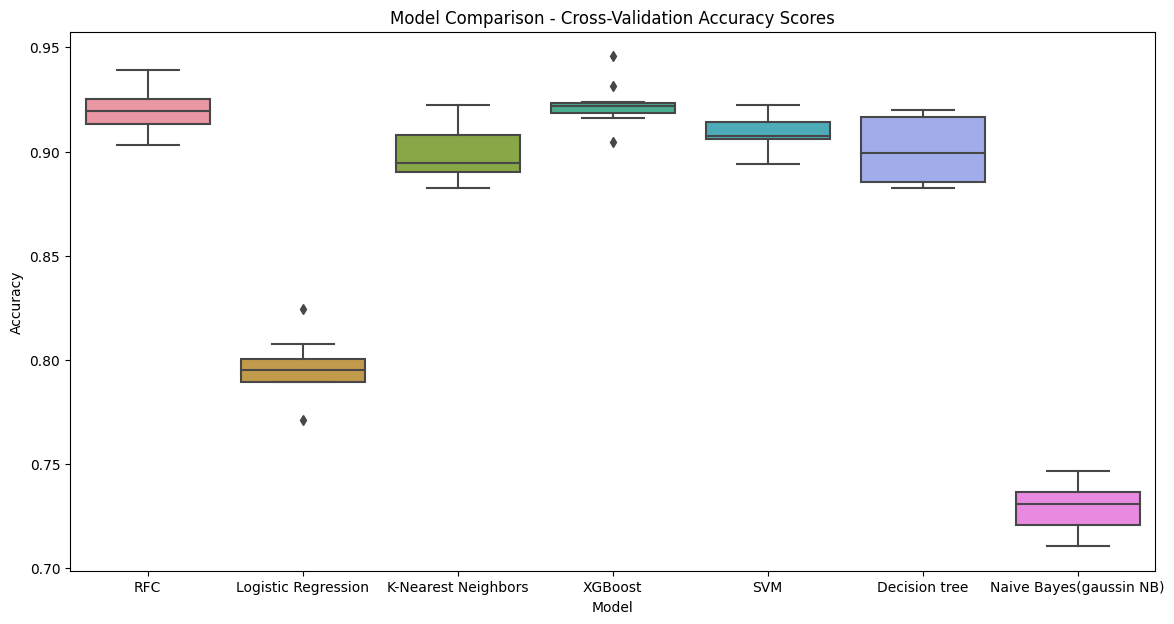

In [ ]:
cv_scores_df = pd.DataFrame()

skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and collect the accuracy scores for each model
for name, model in Kmodels.items():
    scores = cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')
    cv_scores_df[name] = scores

# Transpose the DataFrame for easier plotting with seaborn
cv_scores_df = cv_scores_df.melt(var_name='Model', value_name='Accuracy')

# Plot the boxplots
plt.figure(figsize=(14, 7))
sns.boxplot(x='Model', y='Accuracy', data=cv_scores_df)
plt.title('Model Comparison - Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()